In [1]:
from citipy import citipy
import random
import matplotlib.pyplot as plt
import requests
import json
import numpy as np
import pandas as pd
from pprint import pprint
from config import *

In [2]:
def random_lat_lon_generate(number):
    lat_list = [random.randint(-90, 90) for i in range(number)]
    lng_list = [random.randint(-180, 180) for i in range(number)]
    location_list = [(lat_list[i], lng_list[i]) for i in range(number)]
    return location_list

loc_list = random_lat_lon_generate(2000)

def convert_coord_to_city(lat, lon):
    city = citipy.nearest_city(lat, lon)
    name = city.city_name
    code = city.country_code
    return name, code

In [6]:
city_names = []
country_codes = []

for loc in loc_list:
    name, code = convert_coord_to_city(loc[0], loc[1])
    city_names.append(name)
    country_codes.append(code)

df = pd.DataFrame({
    'City Name': city_names,
    'Country Code': country_codes
})

unique_df = df.drop_duplicates()
unique_df = unique_df.reset_index(drop=True)

unique_df['Temperature'] = ""
unique_df['Humidity'] = ""
unique_df['Cloudiness'] = ""
unique_df['Wind Speed'] = ""
unique_df['Latitude'] = ""
unique_df['Longitude'] = ""

unique_df.head()

In [8]:
base_url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={OpenWeather_api_key}"

# use iterrows to iterate through pandas dataframe
counter = 0
for index, row in unique_df.iterrows():
    
    # progress of the request
    print(f"Now handling city #{counter}: {row['City Name']}")
    counter += 1
    
    # assemble url and make API request
    query_url = f"{base_url}&q={row['City Name']},{row['Country Code']}"
    print(query_url)
    response = requests.get(query_url).json()
    
    # extract first result and use pd.set_value to insert into dataframe
    results = response.get('main')
    if (results):
        unique_df.set_value(index, 'Temperature', response['main']['temp'])
        unique_df.set_value(index, 'Humidity', response['main']['humidity'])
        unique_df.set_value(index, 'Cloudiness', response['clouds']['all'])
        unique_df.set_value(index, 'Wind Speed', response['wind']['speed'])
        unique_df.set_value(index, 'Latitude', response['coord']['lat'])
        unique_df.set_value(index, 'Longitude', response['coord']['lon'])
    else:
        print(f"No results for {row['City Name']}")
    print("------------------")

Now handling city #0: ushuaia
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=ushuaia,ar
------------------
Now handling city #1: marawi
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=marawi,sd
------------------
Now handling city #2: saint-ambroise
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=saint-ambroise,ca
------------------
Now handling city #3: greeneville
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=greeneville,us
------------------
Now handling city #4: mount gambier
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=mount gambier,au
------------------
Now handling city #5: severo-kurilsk
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=severo-kurilsk,ru
-

------------------
Now handling city #49: dikson
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=dikson,ru
------------------
Now handling city #50: mangrol
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=mangrol,in
------------------
Now handling city #51: morondava
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=morondava,mg
------------------
Now handling city #52: torbay
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=torbay,ca
------------------
Now handling city #53: saint-philippe
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=saint-philippe,re
------------------
Now handling city #54: pechenga
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=pechenga,ru
------

No results for mys shmidta
------------------
Now handling city #98: udayagiri
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=udayagiri,in
------------------
Now handling city #99: provideniya
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=provideniya,ru
------------------
Now handling city #100: oneonta
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=oneonta,us
------------------
Now handling city #101: lebu
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=lebu,cl
------------------
Now handling city #102: port elizabeth
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=port elizabeth,za
------------------
Now handling city #103: san patricio
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d

------------------
Now handling city #147: fortuna
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=fortuna,us
------------------
Now handling city #148: chitrakonda
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=chitrakonda,in
------------------
Now handling city #149: geraldton
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=geraldton,ca
------------------
Now handling city #150: artesia
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=artesia,us
------------------
Now handling city #151: mar del plata
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=mar del plata,ar
------------------
Now handling city #152: havoysund
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=h

------------------
Now handling city #196: armizonskoye
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=armizonskoye,ru
------------------
Now handling city #197: valparaiso
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=valparaiso,cl
------------------
Now handling city #198: tornio
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=tornio,fi
------------------
Now handling city #199: hami
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=hami,cn
------------------
Now handling city #200: faanui
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=faanui,pf
------------------
Now handling city #201: hambantota
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=hambantota,lk
----

------------------
Now handling city #244: faya
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=faya,td
No results for faya
------------------
Now handling city #245: srednekolymsk
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=srednekolymsk,ru
------------------
Now handling city #246: inderborskiy
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=inderborskiy,kz
No results for inderborskiy
------------------
Now handling city #247: havre-saint-pierre
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=havre-saint-pierre,ca
------------------
Now handling city #248: bontang
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=bontang,id
------------------
Now handling city #249: flin flon
https://api.openweathermap.org/data/2.5/w

------------------
Now handling city #291: beitbridge
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=beitbridge,zw
------------------
Now handling city #292: san cristobal
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=san cristobal,ec
------------------
Now handling city #293: sinkat
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=sinkat,sd
No results for sinkat
------------------
Now handling city #294: hamilton
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=hamilton,bm
------------------
Now handling city #295: saint-louis
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=saint-louis,sn
------------------
Now handling city #296: vanavara
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d7

------------------
Now handling city #340: presidente medici
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=presidente medici,br
------------------
Now handling city #341: nanortalik
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=nanortalik,gl
------------------
Now handling city #342: nelson bay
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=nelson bay,au
------------------
Now handling city #343: muisne
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=muisne,ec
------------------
Now handling city #344: ayan
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=ayan,ru
No results for ayan
------------------
Now handling city #345: gari
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80d

------------------
Now handling city #388: chapais
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=chapais,ca
------------------
Now handling city #389: hope
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=hope,us
------------------
Now handling city #390: provost
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=provost,ca
------------------
Now handling city #391: korla
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=korla,cn
------------------
Now handling city #392: kentau
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=kentau,kz
------------------
Now handling city #393: saint-francois
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=saint-francois,gp
--------------

------------------
Now handling city #437: aswan
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=aswan,eg
------------------
Now handling city #438: teresina
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=teresina,br
------------------
Now handling city #439: auki
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=auki,sb
------------------
Now handling city #440: andros town
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=andros town,bs
------------------
Now handling city #441: coolum beach
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=coolum beach,au
------------------
Now handling city #442: sobinka
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=sobinka,ru
------

------------------
Now handling city #486: mocambique
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=mocambique,mz
No results for mocambique
------------------
Now handling city #487: dharchula
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=dharchula,in
------------------
Now handling city #488: tabiauea
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=tabiauea,ki
No results for tabiauea
------------------
Now handling city #489: manalurpet
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=manalurpet,in
No results for manalurpet
------------------
Now handling city #490: noumea
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=noumea,nc
------------------
Now handling city #491: port lincoln
https://api.openweathermap.org/d

------------------
Now handling city #535: tukrah
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=tukrah,ly
No results for tukrah
------------------
Now handling city #536: nuevitas
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=nuevitas,cu
------------------
Now handling city #537: riyadh
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=riyadh,sa
------------------
Now handling city #538: ures
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=ures,mx
------------------
Now handling city #539: gondanglegi
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=gondanglegi,id
------------------
Now handling city #540: gorontalo
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=gor

------------------
Now handling city #584: fairbanks
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=fairbanks,us
------------------
Now handling city #585: purwodadi
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=purwodadi,id
------------------
Now handling city #586: batticaloa
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=batticaloa,lk
------------------
Now handling city #587: tarabuco
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=tarabuco,bo
------------------
Now handling city #588: taoudenni
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=taoudenni,ml
------------------
Now handling city #589: moron
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=moron,mn


------------------
Now handling city #634: new plymouth
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=new plymouth,nz
------------------
Now handling city #635: kontagora
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=kontagora,ng
------------------
Now handling city #636: ossora
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=ossora,ru
------------------
Now handling city #637: irara
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=irara,br
------------------
Now handling city #638: ridgecrest
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=ridgecrest,us
------------------
Now handling city #639: afmadu
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=afmadu,so
No r

------------------
Now handling city #683: west fargo
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=west fargo,us
------------------
Now handling city #684: eureka
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=eureka,us
------------------
Now handling city #685: saint-augustin
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=saint-augustin,ca
------------------
Now handling city #686: taksimo
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=taksimo,ru
------------------
Now handling city #687: bukachacha
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=bukachacha,ru
------------------
Now handling city #688: banjar
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=banj

------------------
Now handling city #731: arroyo
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=arroyo,us
------------------
Now handling city #732: carpentras
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=carpentras,fr
------------------
Now handling city #733: padang
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=padang,id
------------------
Now handling city #734: okakarara
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=okakarara,na
------------------
Now handling city #735: nuuk
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=nuuk,gl
------------------
Now handling city #736: jiuquan
https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a9ab11773c0d71a74f80daad2e65c7fe&q=jiuquan,cn
----------------

In [9]:
new_df = unique_df[unique_df['Temperature'] != ""]
new_df = new_df.reset_index(drop=True)
new_df = new_df.rename(columns={'Temperature': 'Temperature(C)',
                                'Humidity': 'Humidity(%)',
                                'Cloudiness': 'Cloudiness(%)',
                                'Wind Speed': 'Wind Speed(mph)'
                               })
new_df.to_csv('WorldcityWeather.csv')

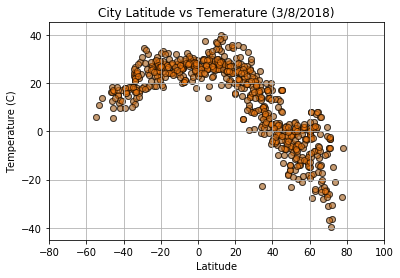

In [35]:
plt.scatter(new_df["Latitude"], 
            new_df["Temperature(C)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.5)

plt.title("City Latitude vs Temerature (3/8/2018)")
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])

plt.savefig("City Latitude vs Temerature.png")
plt.show()

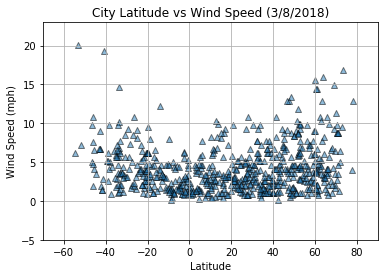

In [36]:
plt.scatter(new_df["Latitude"], 
            new_df["Wind Speed(mph)"],
            edgecolor="black", linewidths=1, marker="^", 
            alpha=0.5)

plt.title("City Latitude vs Wind Speed (3/8/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-70, 90])
plt.ylim([-5, 23])

plt.savefig("City Latitude vs Wind Speed")
plt.show()

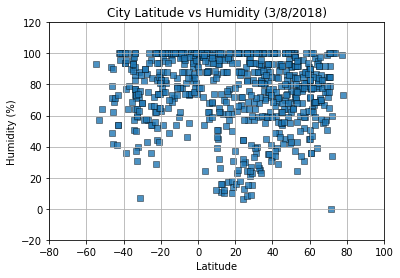

In [37]:
plt.scatter(new_df["Latitude"], 
            new_df["Humidity(%)"],
            edgecolor="black", linewidths=0.5, marker=",", 
            alpha=0.8)

plt.title("City Latitude vs Humidity (3/8/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 120])

plt.savefig("City Latitude vs Humidity")
plt.show()

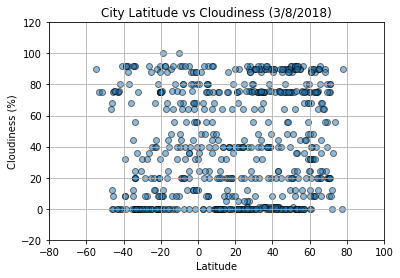

In [38]:
plt.scatter(new_df["Latitude"], 
            new_df["Cloudiness(%)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.5)

plt.title("City Latitude vs Cloudiness (3/8/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 120])

plt.savefig("City Latitude vs Cloudiness.png")
plt.show()